In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [2]:
# Load cleaned data
df = pd.read_csv('../data/cleaned_panel_data.csv')

print(f"Dataset shape: {df.shape}")
print(f"Countries: {df['country'].nunique()}")
print(f"Time period: {int(df['year'].min())} - {int(df['year'].max())}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (623, 26)
Countries: 14
Time period: 1960 - 2025

First few rows:


,country,country_code,year,budget_deficit_surplus,capital_expenditure,consumer_price_index_cpi,defence_expenditure,education_expenditure,expenditure,exports,...,inflation_rate,interest_rate,labour_force,nominal_gdp,population,real_gdp,revenue,tax_revenue,unemployment_rate,value_added_tax_vat
0,Algeria,DZA,1977.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,DZA,1978.0,NaN,NaN,NaN,NaN,NaN,NaN,6.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,DZA,1979.0,NaN,NaN,NaN,NaN,NaN,NaN,9.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Algeria,DZA,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,13.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,DZA,1981.0,NaN,NaN,NaN,NaN,NaN,NaN,14.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Temporal Trends Analysis

### 1.1 Government Debt Trends

In [3]:
# Analyze government debt over time
debt_data = df[['country', 'year', 'government_debt']].dropna()

if len(debt_data) > 0:
    fig = px.line(debt_data, x='year', y='government_debt', color='country',
                  title='Government Debt Over Time by Country',
                  labels={'government_debt': 'Government Debt', 'year': 'Year'},
                  height=600)
    fig.update_layout(hovermode='x unified')
    fig.show()
    
    print(f"\nGovernment Debt Statistics:")
    print(debt_data.groupby('country')['government_debt'].agg(['count', 'mean', 'min', 'max']).round(2))
else:
    print("⚠️ No government debt data available")


Government Debt Statistics:
              count         mean          min           max
country                                                    
Egypt            21     40338.54     18231.00  8.342830e+04
Ghana            12     40365.96     22906.67  6.016080e+04
Nigeria           8  42709807.39  19159809.16  1.216709e+08
Rwanda           14      4315.27       694.38  1.202197e+04
South Africa     66    781556.23      2457.00  5.624092e+06
Togo             55       664.59        11.00  4.156600e+03


### 1.2 GDP Growth Trends

In [4]:
# GDP growth rate trends
gdp_growth = df[['country', 'year', 'gdp_growth_rate']].dropna()

if len(gdp_growth) > 0:
    fig = px.line(gdp_growth, x='year', y='gdp_growth_rate', color='country',
                  title='GDP Growth Rate Over Time',
                  labels={'gdp_growth_rate': 'GDP Growth Rate (%)', 'year': 'Year'},
                  height=600)
    fig.add_hline(y=0, line_dash="dash", line_color="red", annotation_text="Zero Growth")
    fig.update_layout(hovermode='x unified')
    fig.show()
    
    print("\nAverage GDP Growth by Country:")
    avg_growth = gdp_growth.groupby('country')['gdp_growth_rate'].mean().sort_values(ascending=False)
    for country, rate in avg_growth.items():
        print(f"{country:20s}: {rate:6.2f}%")
else:
    print("⚠️ No GDP growth data available")


Average GDP Growth by Country:
Ethiopia            :   8.54%
Rwanda              :   7.55%
Ghana               :   6.11%
Tanzania            :   6.06%
Senegal             :   5.35%
Egypt               :   4.50%
Angola              :   4.46%
Kenya               :   4.35%
Ivory Coast         :   3.45%
Nigeria             :   3.41%
Togo                :   3.10%
Algeria             :   2.97%
South Africa        :   2.31%


### 1.3 Inflation Trends

In [5]:
# Inflation rate trends
inflation_data = df[['country', 'year', 'inflation_rate']].dropna()

if len(inflation_data) > 0:
    fig = px.line(inflation_data, x='year', y='inflation_rate', color='country',
                  title='Inflation Rate Over Time',
                  labels={'inflation_rate': 'Inflation Rate (%)', 'year': 'Year'},
                  height=600)
    fig.add_hline(y=2, line_dash="dash", line_color="green", annotation_text="Target: 2%")
    fig.add_hline(y=10, line_dash="dash", line_color="orange", annotation_text="High: 10%")
    fig.update_layout(hovermode='x unified')
    fig.show()
    
    print("\nInflation Statistics by Country:")
    print(inflation_data.groupby('country')['inflation_rate'].agg(['mean', 'std', 'min', 'max']).round(2))
else:
    print("⚠️ No inflation data available")


Inflation Statistics by Country:
               mean    std    min     max
country                                  
Algeria        4.79   2.30   1.22    9.29
Angola        21.00   5.95  12.55   26.48
Egypt         11.56   7.82   2.40   29.80
Ethiopia      14.91   9.00   7.40   33.80
Ghana         17.24  12.09   7.80   53.60
Ivory Coast    2.55   1.95  -0.26    6.71
Kenya          7.62   3.36   3.90   16.60
Nigeria       14.91   5.98   8.00   29.90
Rwanda         6.50   5.83   0.60   20.70
South Africa   9.18  12.47   0.20  101.90
Tanzania       4.08   1.08   3.00    6.50
Togo           2.53   2.94  -3.77    7.50


### 1.4 Budget Balance (Deficit/Surplus)

In [6]:
# Budget deficit/surplus trends
budget_data = df[['country', 'year', 'budget_deficit_surplus']].dropna()

if len(budget_data) > 0:
    fig = px.line(budget_data, x='year', y='budget_deficit_surplus', color='country',
                  title='Budget Balance Over Time (Negative = Deficit)',
                  labels={'budget_deficit_surplus': 'Budget Balance', 'year': 'Year'},
                  height=600)
    fig.add_hline(y=0, line_dash="dash", line_color="black", annotation_text="Balanced Budget")
    fig.update_layout(hovermode='x unified')
    fig.show()
    
    # Count deficit vs surplus years
    budget_data['status'] = budget_data['budget_deficit_surplus'].apply(
        lambda x: 'Surplus' if x > 0 else 'Deficit'
    )
    print("\nBudget Status by Country:")
    print(budget_data.groupby(['country', 'status']).size().unstack(fill_value=0))
else:
    print("⚠️ No budget balance data available")


Budget Status by Country:
status        Deficit  Surplus
country                       
Egypt              18        0
Ethiopia           10        0
Ghana              14        0
Ivory Coast        56        9
Nigeria            15        0
Senegal            11        0
South Africa       34       32
Tanzania           14        0
Togo               31        4


## 2. Cross-Country Comparisons

### 2.1 Recent Economic Snapshot (Last 5 Years)

In [7]:
# Get most recent 5 years of data
recent_years = df['year'].max() - 5
df_recent = df[df['year'] >= recent_years]

# Calculate averages for recent period
recent_avg = df_recent.groupby('country').agg({
    'gdp_growth_rate': 'mean',
    'inflation_rate': 'mean',
    'government_debt': 'mean',
    'unemployment_rate': 'mean'
}).round(2)

recent_avg.columns = ['Avg_GDP_Growth_%', 'Avg_Inflation_%', 'Avg_Debt', 'Avg_Unemployment_%']
print(f"Average Indicators (Last 5 Years: {int(recent_years)}-{int(df['year'].max())}):")
print(recent_avg.sort_values('Avg_GDP_Growth_%', ascending=False))

Average Indicators (Last 5 Years: 2020-2025):
              Avg_GDP_Growth_%  Avg_Inflation_%     Avg_Debt  \
country                                                        
Rwanda                    6.90             7.58      9063.94   
Ethiopia                  6.82            26.60          NaN   
Togo                      5.34             3.61      2649.42   
Ivory Coast               5.32             3.25          NaN   
Tanzania                  5.26             3.70          NaN   
Ghana                     4.89            22.03     51608.83   
Kenya                     4.56             6.13          NaN   
Senegal                   4.32              NaN          NaN   
Egypt                     3.93            16.39     79535.92   
Nigeria                   2.14            20.07  54972873.01   
Angola                    1.81            21.00          NaN   
Algeria                   1.80             5.72          NaN   
South Africa              0.40             4.80   4481176.

In [8]:
# Visualize recent GDP growth comparison
gdp_recent = df_recent[['country', 'gdp_growth_rate']].dropna()

if len(gdp_recent) > 0:
    fig = px.box(gdp_recent, x='country', y='gdp_growth_rate',
                 title=f'GDP Growth Rate Distribution (Last 5 Years)',
                 labels={'gdp_growth_rate': 'GDP Growth Rate (%)', 'country': 'Country'},
                 color='country',
                 height=500)
    fig.update_xaxes(tickangle=-45)
    fig.show()

### 2.2 Trade Balance Analysis

In [9]:
# Calculate trade balance (Exports - Imports)
trade_data = df[['country', 'year', 'exports', 'imports']].dropna()

if len(trade_data) > 0:
    trade_data['trade_balance'] = trade_data['exports'] - trade_data['imports']
    trade_data['trade_status'] = trade_data['trade_balance'].apply(
        lambda x: 'Surplus' if x > 0 else 'Deficit'
    )
    
    # Recent trade balance
    trade_recent = trade_data[trade_data['year'] >= recent_years]
    
    fig = px.bar(trade_recent, x='year', y='trade_balance', color='country',
                 title='Trade Balance by Country (Last 5 Years)',
                 labels={'trade_balance': 'Trade Balance', 'year': 'Year'},
                 barmode='group',
                 height=500)
    fig.add_hline(y=0, line_dash="dash", line_color="black")
    fig.show()
    
    print("\nTrade Status Summary (Last 5 Years):")
    print(trade_recent.groupby(['country', 'trade_status']).size().unstack(fill_value=0))
else:
    print("⚠️ Insufficient trade data available")


Trade Status Summary (Last 5 Years):
trade_status  Deficit  Surplus
country                       
Algeria             0        4
Angola              0        6
Egypt               5        0
Ethiopia            5        0
Ghana               1        5
Ivory Coast         1        2
Kenya               5        0
Nigeria             2        4
Rwanda              5        0
Senegal             5        0
South Africa        4        2
Tanzania            5        0
Togo                5        0


### 2.3 Revenue vs Expenditure Analysis

In [10]:
# Compare revenue and expenditure
fiscal_data = df[['country', 'year', 'revenue', 'expenditure']].dropna()

if len(fiscal_data) > 0:
    fiscal_data['fiscal_gap'] = fiscal_data['revenue'] - fiscal_data['expenditure']
    fiscal_data['fiscal_gap_pct'] = (fiscal_data['fiscal_gap'] / fiscal_data['revenue'] * 100)
    
    # Recent fiscal performance
    fiscal_recent = fiscal_data[fiscal_data['year'] >= recent_years]
    
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Revenue vs Expenditure', 'Fiscal Gap (%)'))
    
    for country in fiscal_recent['country'].unique():
        country_data = fiscal_recent[fiscal_recent['country'] == country]
        fig.add_trace(go.Scatter(x=country_data['revenue'], y=country_data['expenditure'],
                                mode='markers', name=country,
                                text=country_data['year']), row=1, col=1)
    
    # Add 45-degree line (balanced budget)
    max_val = max(fiscal_recent['revenue'].max(), fiscal_recent['expenditure'].max())
    fig.add_trace(go.Scatter(x=[0, max_val], y=[0, max_val], mode='lines',
                            line=dict(dash='dash', color='red'),
                            name='Balanced', showlegend=False), row=1, col=1)
    
    for country in fiscal_recent['country'].unique():
        country_data = fiscal_recent[fiscal_recent['country'] == country]
        fig.add_trace(go.Box(y=country_data['fiscal_gap_pct'], name=country,
                            showlegend=False), row=1, col=2)
    
    fig.update_xaxes(title_text="Revenue", row=1, col=1)
    fig.update_yaxes(title_text="Expenditure", row=1, col=1)
    fig.update_yaxes(title_text="Fiscal Gap (%)", row=1, col=2)
    fig.update_layout(height=500, title_text="Fiscal Position Analysis")
    fig.show()
    
    print("\nAverage Fiscal Gap (% of Revenue):")
    avg_gap = fiscal_recent.groupby('country')['fiscal_gap_pct'].mean().sort_values()
    for country, gap in avg_gap.items():
        status = "Surplus" if gap > 0 else "Deficit"
        print(f"{country:20s}: {gap:7.2f}% ({status})")
else:
    print("⚠️ Insufficient fiscal data available")


Average Fiscal Gap (% of Revenue):
Nigeria             : -184.47% (Deficit)
Rwanda              :  -81.07% (Deficit)
Ghana               :  -53.00% (Deficit)
Egypt               :  -35.53% (Deficit)
Ivory Coast         :  -34.03% (Deficit)
Kenya               :  -30.76% (Deficit)
Ethiopia            :  -29.05% (Deficit)
Tanzania            :  -27.17% (Deficit)
Togo                :    0.00% (Deficit)


## 3. Correlation Analysis

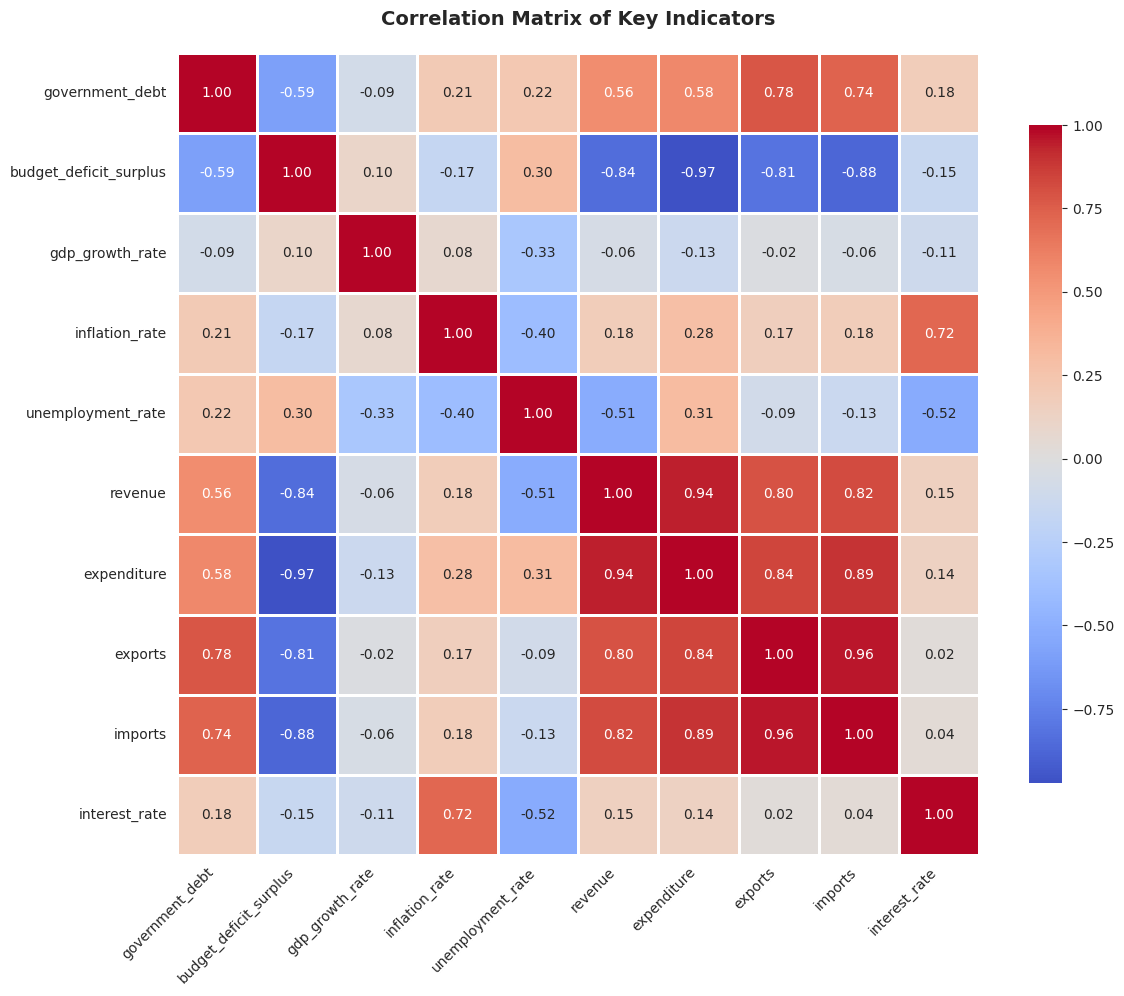


Top Positive Correlations:
exports      imports        0.959346
imports      exports        0.959346
expenditure  revenue        0.942689
revenue      expenditure    0.942689
imports      expenditure    0.893638
expenditure  imports        0.893638
exports      expenditure    0.842658
expenditure  exports        0.842658
revenue      imports        0.821672
imports      revenue        0.821672
dtype: float64

Top Negative Correlations:
budget_deficit_surplus  expenditure              -0.972063
expenditure             budget_deficit_surplus   -0.972063
budget_deficit_surplus  imports                  -0.876417
imports                 budget_deficit_surplus   -0.876417
revenue                 budget_deficit_surplus   -0.844005
budget_deficit_surplus  revenue                  -0.844005
exports                 budget_deficit_surplus   -0.811807
budget_deficit_surplus  exports                  -0.811807
                        government_debt          -0.591174
government_debt         budg

In [11]:
# Select key indicators for correlation analysis
corr_cols = ['government_debt', 'budget_deficit_surplus', 'gdp_growth_rate', 
             'inflation_rate', 'unemployment_rate', 'revenue', 'expenditure',
             'exports', 'imports', 'interest_rate']

# Filter to available columns
available_corr_cols = [col for col in corr_cols if col in df.columns]

# Calculate correlation matrix
corr_matrix = df[available_corr_cols].corr()

# Visualize
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Key Indicators', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nTop Positive Correlations:")
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1]
print(corr_pairs.sort_values(ascending=False).head(10))

print("\nTop Negative Correlations:")
print(corr_pairs.sort_values(ascending=True).head(10))

## 4. Social Spending Analysis

In [12]:
# Analyze health and education expenditure
social_cols = ['country', 'year', 'health_expenditure', 'education_expenditure', 
               'defence_expenditure', 'expenditure']
available_social = [col for col in social_cols if col in df.columns]

social_data = df[available_social].dropna(subset=['health_expenditure', 'education_expenditure'], how='all')

if len(social_data) > 0:
    # Calculate shares of total expenditure
    if 'expenditure' in social_data.columns:
        if 'health_expenditure' in social_data.columns:
            social_data['health_pct'] = (social_data['health_expenditure'] / social_data['expenditure'] * 100)
        if 'education_expenditure' in social_data.columns:
            social_data['education_pct'] = (social_data['education_expenditure'] / social_data['expenditure'] * 100)
        if 'defence_expenditure' in social_data.columns:
            social_data['defence_pct'] = (social_data['defence_expenditure'] / social_data['expenditure'] * 100)
    
    print("Social Spending Summary:")
    print(social_data.groupby('country')[['health_expenditure', 'education_expenditure']].mean().round(2))
    
    # Visualize if we have percentage data
    pct_cols = [col for col in ['health_pct', 'education_pct', 'defence_pct'] if col in social_data.columns]
    if pct_cols:
        fig = px.box(social_data.melt(id_vars=['country', 'year'], value_vars=pct_cols),
                     x='country', y='value', color='variable',
                     title='Social Spending as % of Total Expenditure',
                     labels={'value': 'Percentage of Total Expenditure', 'variable': 'Category'},
                     height=500)
        fig.update_xaxes(tickangle=-45)
        fig.show()
else:
    print("⚠️ Limited social spending data available")
    print(f"Available columns: {available_social}")

Social Spending Summary:
              health_expenditure  education_expenditure
country                                                
Nigeria                   189.38                    NaN
South Africa            36828.05               59556.95


## 5. Data Quality Assessment

In [13]:
# Calculate data completeness score for each country
def completeness_score(group):
    numeric_cols = group.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col != 'year']
    if len(numeric_cols) == 0:
        return 0
    return group[numeric_cols].notna().sum().sum() / (len(group) * len(numeric_cols)) * 100

country_quality = df.groupby('country').apply(completeness_score).sort_values(ascending=False)
country_quality.name = 'Completeness_%'

# Add year coverage
year_coverage = df.groupby('country')['year'].agg(['count', 'min', 'max'])
year_coverage['year_span'] = year_coverage['max'] - year_coverage['min'] + 1

quality_summary = pd.concat([country_quality, year_coverage], axis=1)
quality_summary.columns = ['Completeness_%', 'Observations', 'First_Year', 'Last_Year', 'Year_Span']

print("Data Quality Summary by Country:\n")
print(quality_summary.sort_values('Completeness_%', ascending=False).round(1))

Data Quality Summary by Country:

              Completeness_%  Observations  First_Year  Last_Year  Year_Span
country                                                                     
Kenya                   48.9            28      1998.0     2025.0       28.0
Togo                    47.9            61      1965.0     2025.0       61.0
Ethiopia                47.8            16      2008.0     2024.0       17.0
Nigeria                 46.0            45      1981.0     2025.0       45.0
South Africa            44.5            66      1960.0     2025.0       66.0
Ivory Coast             43.9            66      1960.0     2025.0       66.0
Rwanda                  42.1            36      1990.0     2025.0       36.0
Tanzania                37.8            29      1997.0     2025.0       29.0
Egypt                   35.0            44      1982.0     2025.0       44.0
Senegal                 23.2            26      2000.0     2025.0       26.0
Angola                  23.2            36

In [14]:
# Visualize data quality
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('Data Completeness by Country', 'Temporal Coverage'),
                    specs=[[{"type": "bar"}, {"type": "bar"}]])

fig.add_trace(go.Bar(x=quality_summary.index, y=quality_summary['Completeness_%'],
                     marker_color='steelblue', name='Completeness'), row=1, col=1)

fig.add_trace(go.Bar(x=quality_summary.index, y=quality_summary['Year_Span'],
                     marker_color='coral', name='Year Span'), row=1, col=2)

fig.update_xaxes(tickangle=-45, row=1, col=1)
fig.update_xaxes(tickangle=-45, row=1, col=2)
fig.update_yaxes(title_text="Completeness (%)", row=1, col=1)
fig.update_yaxes(title_text="Years", row=1, col=2)
fig.update_layout(height=500, showlegend=False, title_text="Data Quality Metrics")
fig.show()

## 6. Focus Countries Selection

In [15]:
# Select top 6 countries based on:
# 1. Data completeness
# 2. Recent data availability
# 3. Key indicator coverage (debt, GDP, inflation)

# Check recent data availability (last 10 years)
recent_cutoff = df['year'].max() - 10
recent_data = df[df['year'] >= recent_cutoff]

# Key indicators for debt analysis
key_indicators = ['government_debt', 'gdp_growth_rate', 'inflation_rate', 
                  'budget_deficit_surplus', 'revenue', 'expenditure']
available_key = [col for col in key_indicators if col in df.columns]

# Score each country
country_scores = pd.DataFrame()
country_scores['completeness'] = country_quality
country_scores['recent_obs'] = recent_data.groupby('country').size()
country_scores['key_indicator_coverage'] = recent_data.groupby('country')[available_key].apply(
    lambda x: x.notna().sum().sum() / (len(x) * len(available_key)) * 100
)

# Normalize scores
for col in country_scores.columns:
    country_scores[f'{col}_norm'] = (country_scores[col] - country_scores[col].min()) / (country_scores[col].max() - country_scores[col].min())

# Calculate composite score
country_scores['composite_score'] = (
    country_scores['completeness_norm'] * 0.4 +
    country_scores['recent_obs_norm'] * 0.3 +
    country_scores['key_indicator_coverage_norm'] * 0.3
) * 100

country_scores = country_scores.sort_values('composite_score', ascending=False)

print("Country Selection Ranking:\n")
print(country_scores[['completeness', 'recent_obs', 'key_indicator_coverage', 'composite_score']].round(1))

# Select top 6
focus_countries = country_scores.head(6).index.tolist()

print("\n" + "="*70)
print("🎯 RECOMMENDED FOCUS COUNTRIES FOR DETAILED ANALYSIS:")
print("="*70)
for i, country in enumerate(focus_countries, 1):
    score = country_scores.loc[country, 'composite_score']
    completeness = country_scores.loc[country, 'completeness']
    print(f"{i}. {country:20s} - Score: {score:5.1f} (Completeness: {completeness:5.1f}%)")

# Save focus countries list
with open('../data/focus_countries.txt', 'w') as f:
    f.write(','.join(focus_countries))
print("\n✅ Focus countries saved to ../data/focus_countries.txt")

Country Selection Ranking:

              completeness  recent_obs  key_indicator_coverage  \
country                                                          
Togo                  47.9          11                    92.4   
Nigeria               46.0          11                    89.4   
South Africa          44.5          11                    81.8   
Kenya                 48.9          11                    65.2   
Ivory Coast           43.9          11                    77.3   
Egypt                 35.0          11                    87.9   
Rwanda                42.1          11                    65.2   
Tanzania              37.8          11                    74.2   
Ghana                 22.5          11                    98.5   
Ethiopia              47.8          10                    83.3   
Senegal               23.2          11                    45.5   
Angola                23.2          11                    22.7   
Algeria               18.5          11          

## 7. Key Insights Summary

In [16]:
print("="*70)
print("KEY INSIGHTS FROM EXPLORATORY ANALYSIS")
print("="*70)

# 1. GDP Growth
if 'gdp_growth_rate' in df.columns:
    recent_growth = df_recent.groupby('country')['gdp_growth_rate'].mean().sort_values(ascending=False)
    print("\n1. GDP GROWTH LEADERS (Last 5 Years):")
    print(f"   Top: {recent_growth.index[0]} ({recent_growth.iloc[0]:.2f}%)")
    print(f"   Bottom: {recent_growth.index[-1]} ({recent_growth.iloc[-1]:.2f}%)")

# 2. Inflation
if 'inflation_rate' in df.columns:
    recent_inflation = df_recent.groupby('country')['inflation_rate'].mean().sort_values()
    high_inflation = recent_inflation[recent_inflation > 10]
    print(f"\n2. INFLATION:")
    print(f"   Countries with avg inflation >10%: {len(high_inflation)}")
    if len(high_inflation) > 0:
        print(f"   Highest: {high_inflation.index[-1]} ({high_inflation.iloc[-1]:.2f}%)")

# 3. Budget Balance
if 'budget_deficit_surplus' in df.columns:
    deficit_countries = df_recent[df_recent['budget_deficit_surplus'] < 0]['country'].nunique()
    print(f"\n3. FISCAL POSITION:")
    print(f"   Countries running deficits: {deficit_countries}/{df['country'].nunique()}")

# 4. Data Coverage
print(f"\n4. DATA QUALITY:")
print(f"   Best coverage: {quality_summary['Completeness_%'].idxmax()} ({quality_summary['Completeness_%'].max():.1f}%)")
print(f"   Average completeness: {quality_summary['Completeness_%'].mean():.1f}%")

print("\n" + "="*70)
print("✅ EDA Complete! Ready for Feature Engineering & Modeling")
print("="*70)

KEY INSIGHTS FROM EXPLORATORY ANALYSIS

1. GDP GROWTH LEADERS (Last 5 Years):
   Top: Rwanda (6.90%)
   Bottom: Botswana (nan%)

2. INFLATION:
   Countries with avg inflation >10%: 5
   Highest: Ethiopia (26.60%)

3. FISCAL POSITION:
   Countries running deficits: 9/14

4. DATA QUALITY:
   Best coverage: Kenya (48.9%)
   Average completeness: 34.9%

✅ EDA Complete! Ready for Feature Engineering & Modeling


## ✅ Exploratory Data Analysis Complete!

### Key Findings:
1. **Data Coverage**: Identified countries with best data quality for modeling
2. **Economic Trends**: Analyzed GDP growth, inflation, and fiscal patterns
3. **Trade Balance**: Assessed export-import dynamics
4. **Fiscal Health**: Evaluated revenue, expenditure, and deficit trends
5. **Social Spending**: Examined health, education, and defense allocations
6. **Correlations**: Identified relationships between key indicators

### Focus Countries Selected:
Top 6 countries with best data quality and recent coverage for detailed ML modeling

### Next Steps:
1. **Feature Engineering** (`02_feature_engineering.ipynb`)
   - Create debt crisis labels
   - Engineer ML features
   - Prepare train/test splits

2. **ML Model Development** (`03_ml_debt_crisis.ipynb`)
   - Build classification models
   - Predict debt crisis risk
   - Generate country risk scores